CONVOLUTIONAL NEURAL NETWORK

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore' , category=FutureWarning)
%matplotlib inline

DATA PREPERATION

In [2]:
#organize data into train , test and validation directories
os.chdir('dogs vs cats')
if os.path.isdir('train/cat') is False:
    os.makedirs('train/cat')
    os.makedirs('train/dog')
    os.makedirs('valid/cat')
    os.makedirs('valid/dog')
    os.makedirs('test/cat')
    os.makedirs('test/dog')
#for recursively searching through the subdirectories as well use glob.glob('**/cat*'), recursion = True
for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')

In [3]:
os.chdir('../')

In [2]:
train_path = 'dogs vs cats/train'
test_path= 'dogs vs cats/test'
valid_path = 'dogs vs cats/valid'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
       .flow_from_directory(directory = train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
       .flow_from_directory(directory = valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
       .flow_from_directory(directory = test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False )

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [5]:
imgs, labels = next(train_batches)

In [6]:
#this function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes= plt.subplots(1, 10, figsize=(20,20))
    axes= axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

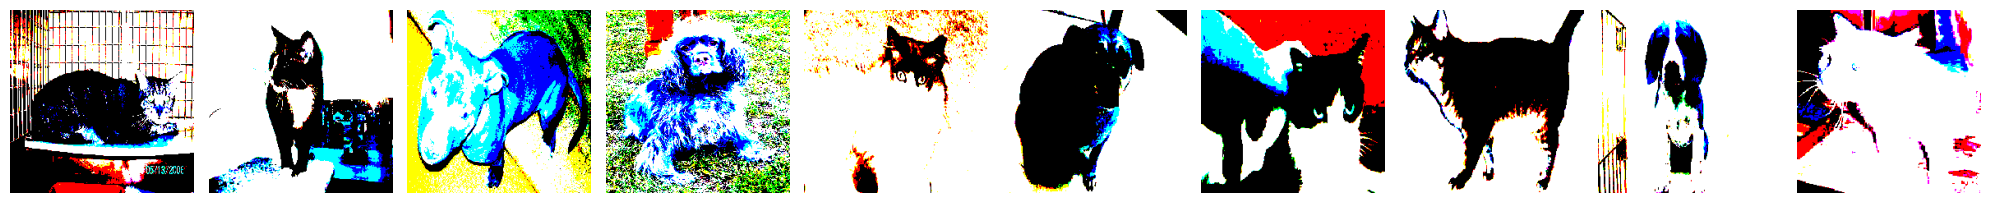

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

  BUILD AND TRAIN A CONVOLUTIONAL NEURAL NETWORK

In [11]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3),
           kernel_regularizer=regularizers.l2(0.01)),  # L2 weight regularization
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(0.01)),  # L2 weight regularization
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])


In [12]:
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [13]:
model.compile(optimizer=legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x= train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 4s - loss: 18.4966 - accuracy: 0.5380 - val_loss: 9.9795 - val_accuracy: 0.5300 - 4s/epoch - 35ms/step
Epoch 2/10
100/100 - 3s - loss: 2.7213 - accuracy: 0.7550 - val_loss: 4.6263 - val_accuracy: 0.6000 - 3s/epoch - 32ms/step
Epoch 3/10
100/100 - 3s - loss: 0.9165 - accuracy: 0.8980 - val_loss: 3.7462 - val_accuracy: 0.5900 - 3s/epoch - 33ms/step
Epoch 4/10
100/100 - 3s - loss: 0.5967 - accuracy: 0.9620 - val_loss: 3.9227 - val_accuracy: 0.6100 - 3s/epoch - 32ms/step
Epoch 5/10
100/100 - 3s - loss: 0.5097 - accuracy: 0.9870 - val_loss: 2.7020 - val_accuracy: 0.6400 - 3s/epoch - 32ms/step
Epoch 6/10
100/100 - 3s - loss: 0.4822 - accuracy: 0.9980 - val_loss: 2.7757 - val_accuracy: 0.6450 - 3s/epoch - 32ms/step
Epoch 7/10
100/100 - 3s - loss: 0.4765 - accuracy: 1.0000 - val_loss: 2.7192 - val_accuracy: 0.6450 - 3s/epoch - 32ms/step
Epoch 8/10
100/100 - 3s - loss: 0.4754 - accuracy: 1.0000 - val_loss: 2.7262 - val_accuracy: 0.6400 - 3s/epoch - 32ms/step
Epoch 9/10
100/

PREDICTION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

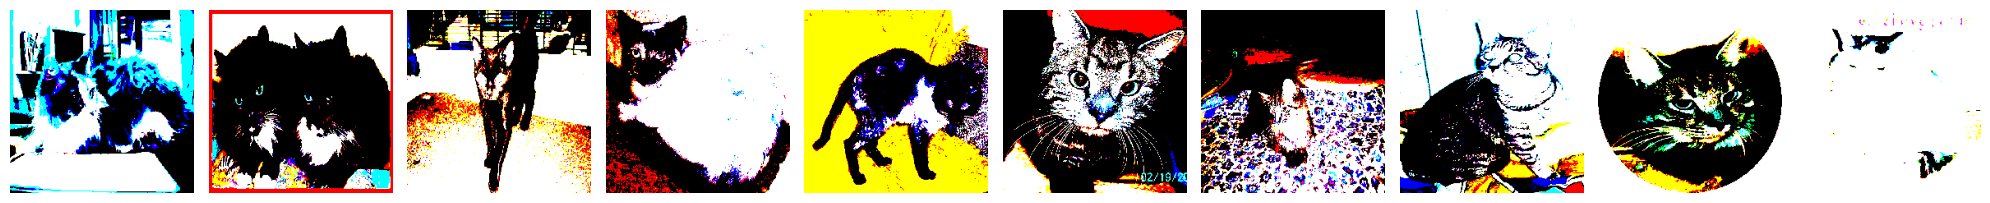

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
test_imgs, test_labels= next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
predictions = model.predict(x= test_batches, verbose=0  )

In [18]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [19]:
cm = confusion_matrix(y_true = test_batches.classes , y_pred=np.argmax(predictions, axis=-1))

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True
    '''
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title) 
    plt.colorbar ()
    tick_marks = np.arange(len (classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks (tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print (cm)

    thresh = cm.max () / 2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color='white' if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [22]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[31 19]
 [19 31]]


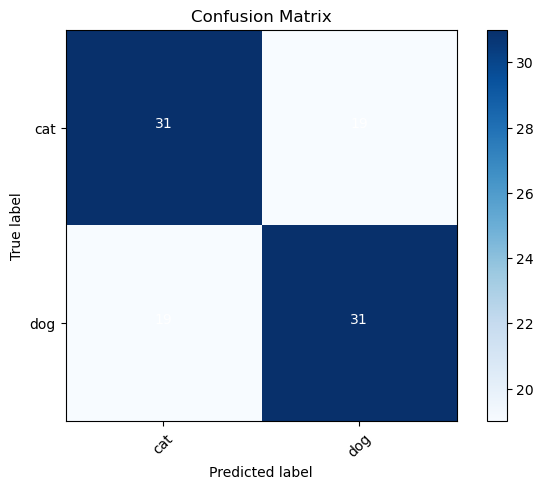

In [23]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')